<a href="https://colab.research.google.com/github/Rishi500/Neural-Networks/blob/master/indian_cricket_player_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from fastai import *

In [0]:
from fastai.vision import *

In [0]:
classes = ['bhuvneshwar','bumrah','dhoni','dinesh','jadeja','jadhav','kuldeep','pandya','rahul','rohit','virat']

In [0]:
folder = 'rohit'
file =  'rohit.txt'

In [0]:
path = Path('data/cricket')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

In [44]:
download_images(path/file, dest, max_pics=200)


Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '

In [45]:
for c in classes:
    print(c)
    verify_images(path/c, delete=True, max_workers=8)

bhuvneshwar


bumrah


dhoni


dinesh


jadeja


jadhav


kuldeep


pandya


rahul


rohit


virat


In [0]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
         size=224, num_workers=4).normalize(imagenet_stats)

In [50]:
data.classes

['bhuvneshwar',
 'bumrah',
 'dhoni',
 'dinesh',
 'jadeja',
 'jadhav',
 'kuldeep',
 'pandya',
 'rahul',
 'rohit',
 'virat']

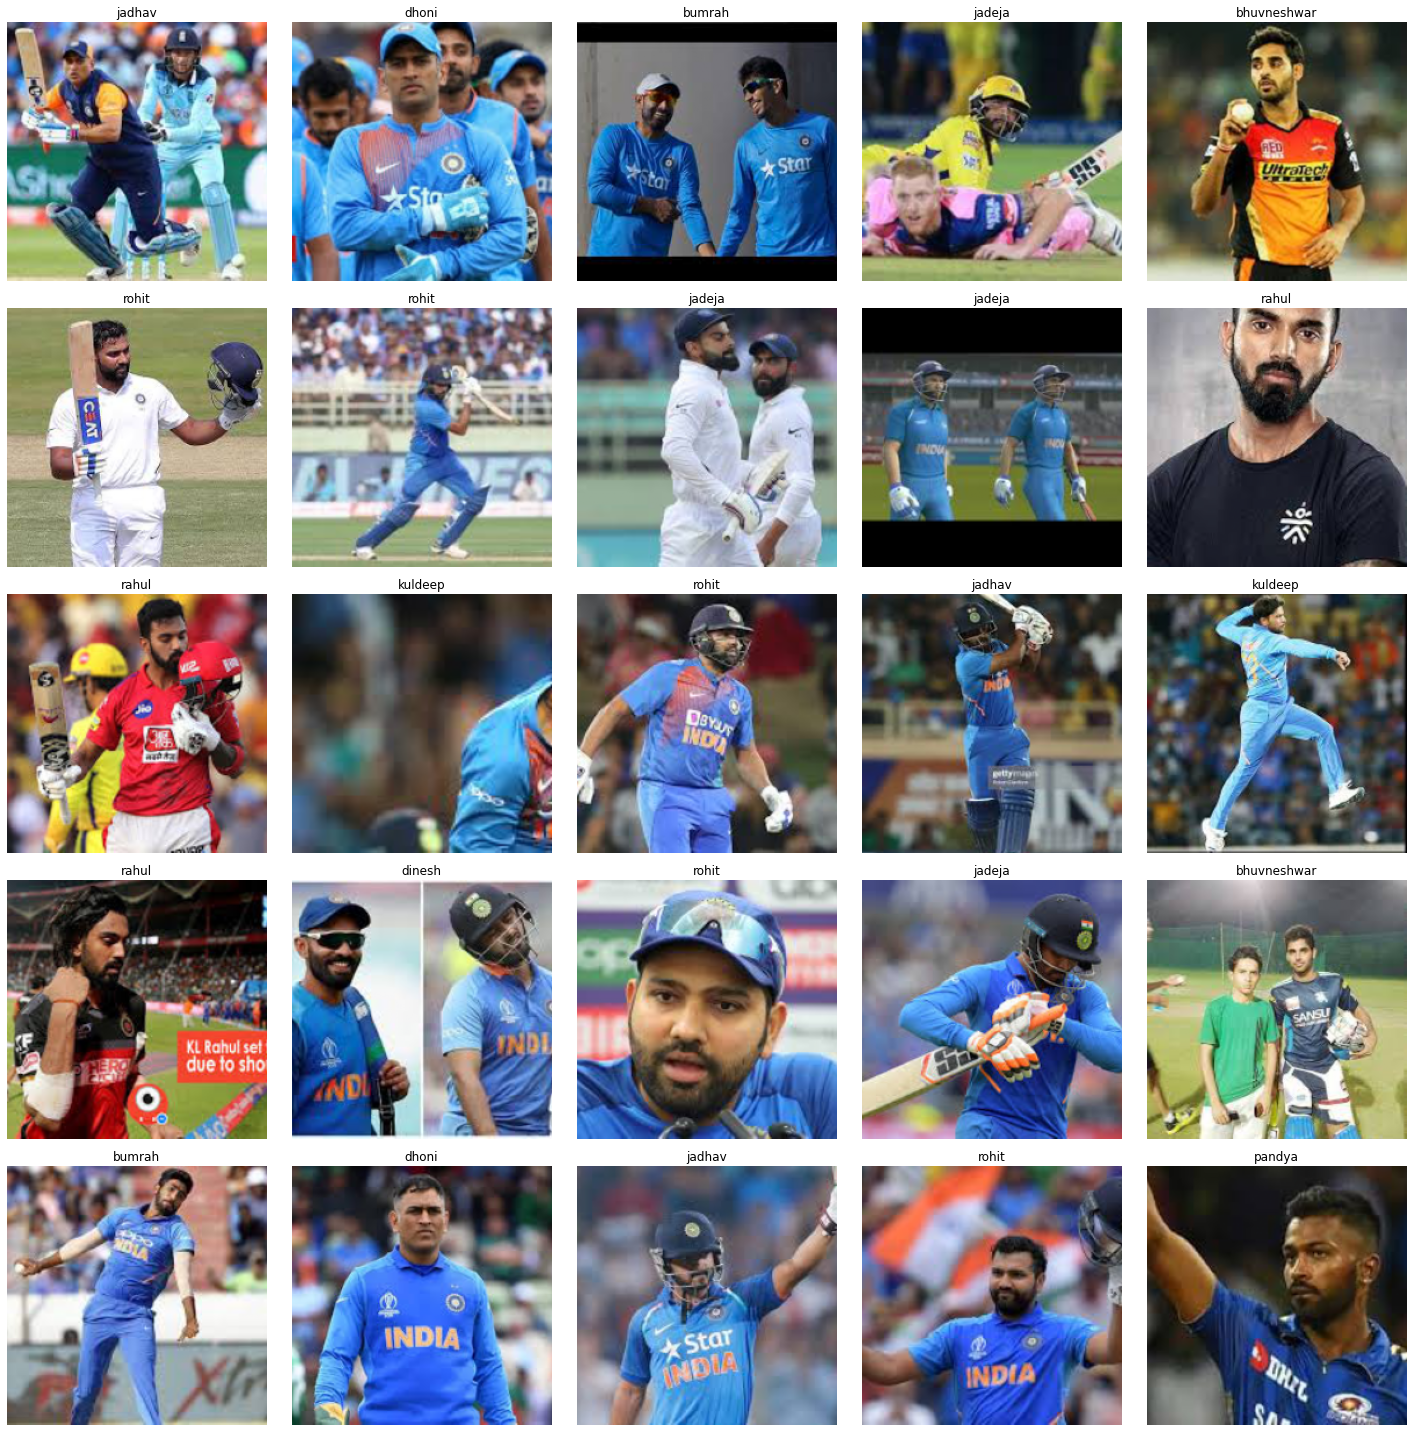

In [51]:
data.show_batch(rows=5, figsize=(20,20))

In [52]:

data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['bhuvneshwar',
  'bumrah',
  'dhoni',
  'dinesh',
  'jadeja',
  'jadhav',
  'kuldeep',
  'pandya',
  'rahul',
  'rohit',
  'virat'],
 11,
 1408,
 352)

In [53]:
learn = create_cnn(data, models.resnet34, metrics=error_rate)

/usr/local/lib/python3.6/dist-packages/fastai/vision/learner.py:106: UserWarning: `create_cnn` is deprecated and is now named `cnn_learner`.
  warn("`create_cnn` is deprecated and is now named `cnn_learner`.")
Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth


In [54]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,3.403619,2.307764,0.687500,00:10
1,2.607136,2.360913,0.673295,00:09
2,1.974412,2.184181,0.605114,00:10
3,1.543351,2.157568,0.627841,00:10


In [0]:
learn.save('stage-1')

In [0]:
learn.unfreeze()

In [57]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


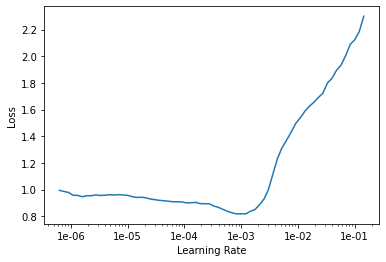

In [58]:
learn.recorder.plot()

In [59]:
learn.fit_one_cycle(2, max_lr=slice(3e-4,1e-3))

epoch,train_loss,valid_loss,error_rate,time
0,1.559439,2.756676,0.676136,00:11
1,1.287155,2.028279,0.553977,00:11


In [0]:
learn.save('stage-2')

In [61]:
learn.fit_one_cycle(2, max_lr=slice(3e-4,1e-3))

epoch,train_loss,valid_loss,error_rate,time
0,0.439520,2.144422,0.571023,00:11
1,0.324670,2.065253,0.528409,00:10


In [0]:
learn.save('stage-3')

In [63]:
learn.fit_one_cycle(2, max_lr=slice(3e-4,1e-3))

epoch,train_loss,valid_loss,error_rate,time
0,0.115021,2.116610,0.514205,00:10
1,0.097793,2.033922,0.519886,00:10


In [0]:
learn.save('stage-4')

In [66]:
learn.load('stage-4')

Learner(data=ImageDataBunch;

Train: LabelList (1408 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
kuldeep,kuldeep,kuldeep,kuldeep,kuldeep
Path: data/cricket;

Valid: LabelList (352 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
jadhav,dinesh,bhuvneshwar,jadeja,pandya
Path: data/cricket;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, 

In [67]:
learn.fit_one_cycle(1, max_lr=slice(3e-4,1e-3))

epoch,train_loss,valid_loss,error_rate,time
0,0.067338,2.002201,0.485795,00:10


In [0]:
learn.save('stage-5')

In [0]:
!mkdir test

In [0]:
img1 = open_image(path/'test'/'virat.jpg')

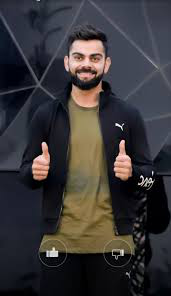

In [77]:
img1

In [78]:
pred_class,pred_idx,outputs = learn.predict(img1)
pred_class

Category virat

In [81]:

interp = ClassificationInterpretation.from_learner(learn)

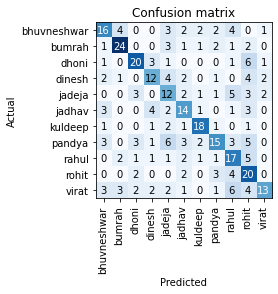

In [82]:
interp.plot_confusion_matrix()